'''

    Code dependencies

        - MarcBS/keras fork v1.0.10
        - staged_keras_wrapper v0.1
        - anaconda
        - theano
        
    Usage
    
        - Insert the paths of keras and keras_wrapper at the top of demo.py before running this demo.
        - Run the section 'Imports and Models loading' only once.
        - Change 'Parameters' and then run the section 'Prediction and visualization' all the times you want.
        
    Reference

        Marc Bolaños and Petia Radeva.
        "Simultaneous Food Localization and Recognition."
        arXiv preprint arXiv:1604.07953 (2016).
        
'''

## Imports and Models loading

In [1]:
import os
pwd = os.getcwd()
from demo import *
from visualization import plot_localization
import numpy as np

%matplotlib inline

count_saved = 0
save_folder = 'results/examples_FAMs/'
save_results = True

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5005)


In [2]:
# Basic parameters loading
params = load_parameters()
# Load localization and recogntion models
############################################################
# Load localization model (GAP model)
locNet = loadStagedModel(params['model_loc_path'])
W = prepareCAM(locNet)
# Load recognition model
if params['apply_recognition']:
    recNet = loadModel(params['model_rec_path'], params['model_rec_iter'])
############################################################

In [3]:
# Load list of classes
#path_classes = '/media/HDD_2TB/DATASETS/EgocentricFood_recognition/classes.txt'
path_classes = '/media/HDD_2TB/DATASETS/UECFOOD256_recognition/classes.txt'
classes = []
with open(path_classes, 'r') as list_c:
    for line in list_c:
        line = line.rstrip('\n')
        line = line.rstrip('\r')
        classes.append(line)

## Parameters

In [239]:
###### Additional parameters
img = '/media/HDD_2TB/DATASETS/UECFOOD256/88/12046.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/63/6380.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/1/4331.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/16/1588.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/16/16030.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/16/15349.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/54/5469.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/54/5477.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/54/15324.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/99/15613.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/99/99.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/99/12641.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/99/11500.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/105/69048.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/105/712.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/105/936.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/105/909.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/105/68457.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/105/610.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/105/183565.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/70/11156.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/70/11161.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/70/13690.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/70/13695.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/70/13723.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/70/13736.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/70/13775.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/70/13782.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/70/13857.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/70/13948.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/70/13995.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/70/14069.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/70/14074.jpg'
#img = '/media/HDD_2TB/DATASETS/UECFOOD256/70/14076.jpg' #### example paper


#img = 'http://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/quizzes/food_safety_quiz/493x335_food_safety_quiz.jpg'
#img = 'http://blogs.uoregon.edu/natewoodburyaad250/files/2012/10/PSD_Food_illustrations_3190_pancakes_with_butter-1wi1tz5.jpg'
#img = 'http://www.cleanfooddirtycity.com/wp-content/uploads/2016/01/20160215-1900-CleanFood_1710.png'
#img='http://www.bkkmenu.com/uploads/content/img/gallery/1100x755/-Cleanfood-5.jpg'
#img='http://also.kottke.org/misc/images/questlove-food-book.jpg'
#img='http://www.bearhotel.co.uk/wp-content/uploads/2015/06/christmas-dinner-for-slider-1-of-1.jpg'
#img='https://s3-ap-southeast-2.amazonaws.com/captain-cook-cms-assets/assets/images-syd-1170x430/2337/sb2-m-lamb_large.jpg'
#img='http://assets.marthastewart.com/styles/wmax-520-highdpi/d37/opener-chicken-sauerkraut-018-d111386/opener-chicken-sauerkraut-018-d111386_vert.jpg'
#img='http://art-depizza.es/wp-content/uploads/2015/12/e9a9d35c744f3ff11a97e32274411d8b_large.jpeg'

# Non-food
#img = 'http://miscmedia-9gag-fun.9cache.com/images/thumbnail-facebook/1449833523.0096_RUvuVA_n.jpg'


# People eating
#img='http://3.bp.blogspot.com/-4sUb3g7nDos/UJBHtcKo2CI/AAAAAAAAUd8/WlSL9IZYsAc/s1600/DSC06612.jpg'
#img='https://cdn0.vox-cdn.com/thumbor/4Eh82YFP6iSb9PjDKhYuQi3joA0=/902x593/cdn0.vox-cdn.com/uploads/chorus_asset/file/1137400/barack-obama-1.0.jpg'
#img='https://i.ytimg.com/vi/dsv6QjNO2t8/maxresdefault.jpg'
#img='https://i.ytimg.com/vi/PLrm7wk8uJ8/maxresdefault.jpg'
#img='http://img.youtube.com/vi/1-SJGQ2HLp8/maxresdefault.jpg'
#img='http://img.phombo.com/img1/photocombo/2313/SB187-014.jpg'
#img='http://fitlifetip.com/wp-content/uploads/2016/07/Salads-Are-For-Losers-Happy-People-Eating-Salad-2.jpg'
#img='http://i.huffpost.com/gen/1662875/images/o-EATING-DINNER-facebook.jpg'
#img='http://ckphu.com/site/wp-content/uploads/2012/07/people-eating.jpg'
#img='http://c8.alamy.com/comp/BHMPPR/a-large-group-of-young-people-eating-in-a-pizza-restaurant-BHMPPR.jpg'3
#img='http://i.dailymail.co.uk/i/pix/2015/04/14/22/237E9D6F00000578-0-image-a-6_1429048547396.jpg'
#img='http://cbsnews3.cbsistatic.com/hub/i/r/2011/06/13/5a78d8b5-8ba1-11e2-9400-029118418759/thumbnail/620x350/aed5e730f16b88a38d849ba73097c6e8/eatingpasta_istock5807703.jpg'
#img='https://www.thesun.co.uk/wp-content/uploads/2016/06/nintchdbpict000242882037.jpg'
#img='https://upload.wikimedia.org/wikipedia/commons/5/54/People_eating_in_Tunisia1.JPG'

##########
is_online = False # set to True if the tested 'img' is a link to an online file
img_format = '.jpg'

out_dir = pwd+'/tmp'

## Prediction and visualization

In [240]:
# Download image if it is located online
if is_online:
    img_out = pwd+'/downloaded_img'+img_format
    os.system('wget '+ img + ' -O '+ img_out)
    img = img_out

In [241]:
# Run localization on selected image
params['img'] = img
params['imgs_list'] = ''
params['results_dir'] = out_dir

# optimal combined and UECFood256 params
"""
params['localization_params_t']=0.4 
params['localization_params_s']=0.1
params['localization_params_e']=0.2

"""
# optimal egocentric params
"""
params['localization_params_t']=0.6 
params['localization_params_s']=0.06 
params['localization_params_e']=0.2
"""

# empirically tested

params['localization_params_t']=0.45
params['localization_params_s']=0.01
params['localization_params_e']=0.2


#params['apply_recognition'] = False

main(params, localization_net=locNet, W=W, recognition_net=recNet)

{'dataset_ref_path': '/media/HDD_2TB/marc/FoodDetection_keras/Datasets/Dataset_FoodVsNoFood.pkl', 'model_loc_path': '/media/HDD_2TB/CNN_MODELS/GoogleNet_FoodVsNoFood_GAP', 'apply_recognition': False, 'img': '/media/HDD_2TB/DATASETS/UECFOOD256/88/12046.jpg', 'use_gpu': True, 'n_top_convs': 0, 'results_dir': '/media/HDD_2TB/marc/FoodDetection_keras/tmp', 'batch_size': 25, 'localization_params_s': 0.01, 'localization_params_t': 0.45, 'reuse_CAM': False, 'imgs_list': '', 'model_rec_iter': 27900, 'model_rec_path': '/media/HDD_2TB/CNN_MODELS/GoogleNet_UECFood256/finetuning_Food101_NoFood', 'localization_params_e': 0.2}
Processed 1/1 images -  ETA: 0s 


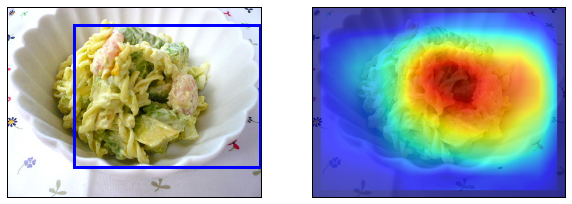

In [242]:
# Load result
result = np.load('tmp/results_loc_rec.npy').item()
fig = plot_localization(result['imgs_paths'], 
                  result['bboxes'], 
                  #scores_list=result['scores'], 
                  #labels_list=result['labels'],
                  img_FAMs_list = ['tmp/000000_CAM.npy'],
                  classes_list=classes, per_row=2, height=10)

In [243]:
if save_results:
    save_name = '%0.8d.jpg' % count_saved
    fig.savefig(save_folder+'/'+save_name, bbox_inches='tight')
    count_saved += 1